In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

data = pd.read_csv('TP2_dataset.csv')

In [2]:
data['Total_M2^2'] = data['Total_M2'] * data['Total_M2']


In [3]:
lm = linear_model.LinearRegression()
lm_elastic = linear_model.ElasticNetCV(normalize = True, cv = 4)
lm_ridgecv = linear_model.RidgeCV(normalize = True, cv = 4)
lm_lassocv = linear_model.LassoCV(normalize = True, cv = 4)


modelos = [lm,lm_elastic,lm_ridgecv,lm_lassocv]

columnas_dummies = ['Ubicacion','Tipo_Propiedad']
dummies = [] 
r2 = []
mae = []
for i in columnas_dummies:
    dummies.append(i)
    x = pd.get_dummies(data[dummies],drop_first=True) 
    y = data['Precio_M2']
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
    model  = lm_lassocv.fit(xtrain,ytrain)
    ypred = lm_lassocv.predict(xtest)
    r2.append(round(lm_lassocv.score(xtrain,ytrain),2))
    mae.append(round(metrics.mean_absolute_error(ytest, ypred)))
    print('LassoCV con columnas',dummies)
    print('r2:',round(lm_lassocv.score(xtrain,ytrain),2))
    print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),0))
    print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),0))
    print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0))

columnas_df= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
              'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']
columnas = []
for i in columnas_df:
    columnas.append(i)
    x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
    model  = lm_lassocv.fit(xtrain,ytrain)
    ypred = lm_lassocv.predict(xtest)
    r2.append(round(lm_lassocv.score(xtrain,ytrain),2))
    mae.append(round(metrics.mean_absolute_error(ytest, ypred)))
    print('LassoCV con columnas',dummies,'y',columnas)
    print('r2:',round(lm_lassocv.score(xtrain,ytrain),2))
    print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),2))
    print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),2))
    print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),2))

total = dummies + columnas



LassoCV con columnas ['Ubicacion']
r2: 0.51
MAE: 499.0
MSE: 418307.0
RMSE: 647.0
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad']
r2: 0.64
MAE: 424.0
MSE: 310636.0
RMSE: 557.0
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2']
r2: 0.67
MAE: 397.53
MSE: 282086.58
RMSE: 531.12
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities']
r2: 0.68
MAE: 392.07
MSE: 274659.63
RMSE: 524.08
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero']
r2: 0.68
MAE: 392.03
MSE: 274645.12
RMSE: 524.07
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad']
r2: 0.68
MAE: 391.13
MSE: 273874.55
RMSE: 523.33
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad', 'vista']
r2: 0.69
MAE: 387.67
MSE: 268536.07
RMSE: 518.2
LassoCV con columnas ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad', 'vista', 'p

In [130]:
lm_lassocv = linear_model.LassoCV(alphas=np.logspace(-5,0, 600),normalize = True, cv = 4)
x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
model  = lm_lassocv.fit(xtrain,ytrain)
ypred = lm_lassocv.predict(xtest)
print('r2:',round(lm_lassocv.score(xtrain,ytrain),2))
print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),2))
print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),2))
print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),2))
lm_lassocv.alpha_


r2: 0.7
MAE: 383.05
MSE: 263293.92
RMSE: 513.12


0.0004409682748428131

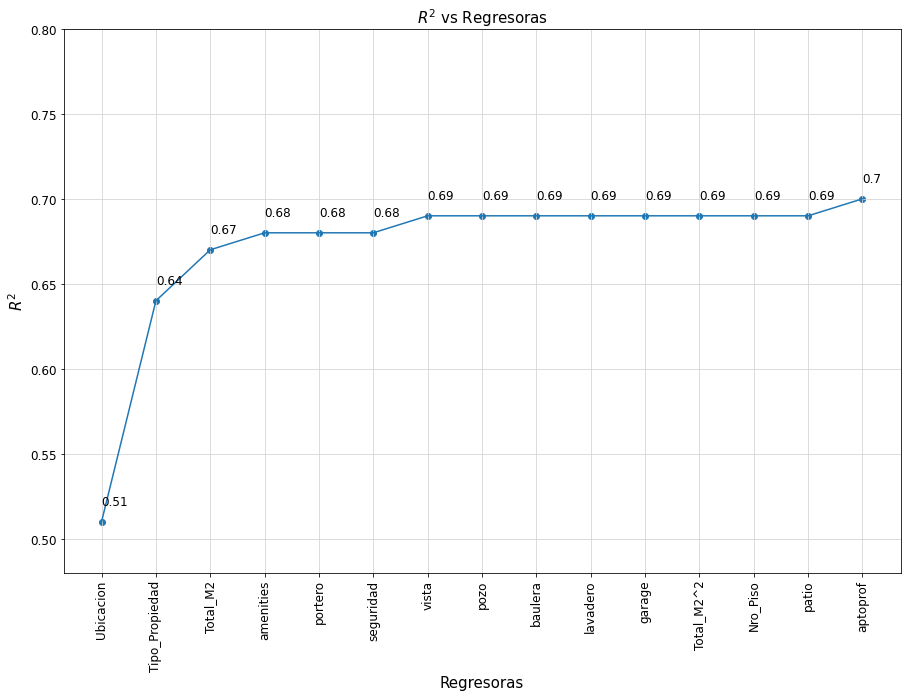

In [10]:
total = dummies + columnas
total


plt.figure(figsize = (15,10))
plt.xticks(rotation=90,fontsize = 12)
plt.xticks(fontsize = 12)
plt.plot(total,r2)
plt.grid(color = '#d4d4d4')
plt.scatter(total,r2)
plt.title(r'$R^2$ vs Regresoras', fontsize = 15)
plt.xlabel('Regresoras',fontsize = 15)
plt.ylabel(r'$R^2$',fontsize = 15)
plt.ylim(min(r2)-0.03, 0.8)

for total , r2_score in enumerate(r2):
    plt.text(total , np.array(r2_score)+0.01,str(r2_score))

#fig, ax1 = plt.subplots(figsize = (15,10))
#plt.xticks(rotation=90)
#plt.grid(color = '#0400de')
#ax1.plot(total,r2,color = '#1c2c4f')

#ax1.set_title(r'$R^2$ vs Regresoras')

#Pongo los total junto a las barras
#for total , r2 in enumerate(r2):
 #   plt.text(total , r2,str(r2))

In [8]:
plt.rcParams.update({'font.size': 12})

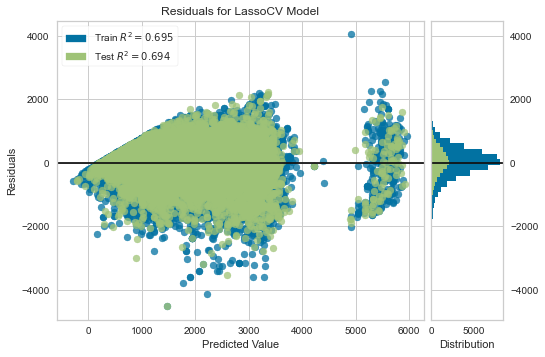

<AxesSubplot:title={'center':'Residuals for LassoCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV



model = LassoCV(normalize = True, cv = 2)
visualizer = ResidualsPlot(model)

visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)

visualizer.show()


In [24]:
lm_lassocv.alpha_

0.002188791241069408

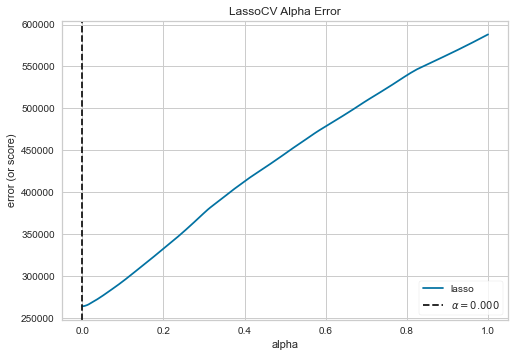

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [131]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-5,0, 600)
model = LassoCV(alphas=alphas , normalize = True, cv = 4)
visualizer = AlphaSelection(model)
visualizer.fit(xtrain,ytrain)
visualizer.show()

In [112]:
lm_lassocv.alphas

2.188791241069408

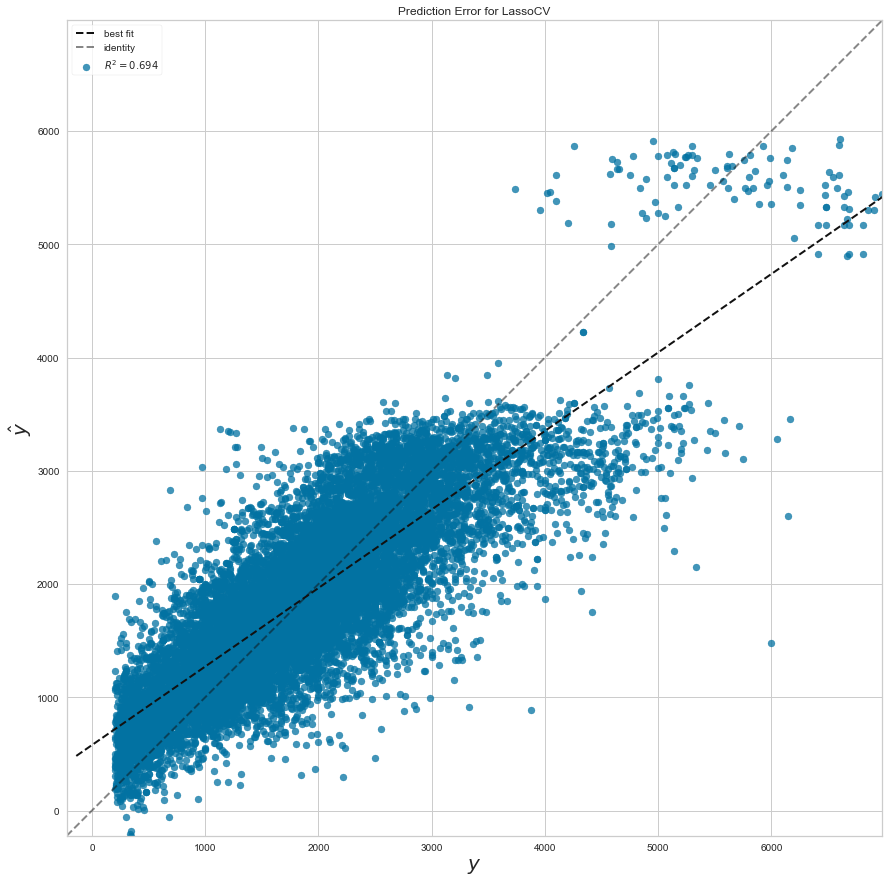

<AxesSubplot:title={'center':'Prediction Error for LassoCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [75]:
#plt.rcParams.update({'font.size': 50})
from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
#visualizer = RadViz(size=(1080, 720))
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel('xlabel',fontsize = 20)
ax.set_ylabel('xlabel',fontsize = 20)
ax.set_title('asd',fontsize = 40)
visualizer = PredictionError(model)
visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.show() 



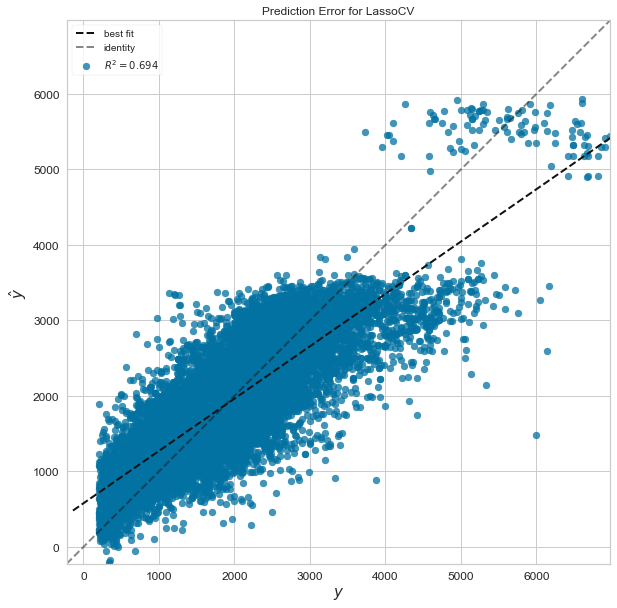

<AxesSubplot:title={'center':'Prediction Error for LassoCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [102]:

from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
#visualizer = RadViz(size=(1080, 720))
#fig, ax = plt.subplots(figsize=(15,15))
#ax.set_xlabel('xlabel',fontsize = 20)
#ax.set_ylabel('xlabel',fontsize = 20)
#ax.set_title('asd',fontsize = 40)
fig = plt.figure(figsize=(15,10))
visualizer = PredictionError(model)
visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.ax.set_xlabel('xlabel',fontsize = 15)
visualizer.ax.set_ylabel('xlabel',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
visualizer.show() 

